In [2]:
import pickle
import json
import sys
import os
import string
import requests

import ast  # for string to list: ast.literal_eval()

from bs4 import BeautifulSoup
import bs4

import time
from datetime import datetime
from datetime import date

import pandas as pd
import numpy as np

import re
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_pickle("jun-jul-aug.pkl").reset_index(drop=True)

In [91]:
df.loc[0,"Link"]

'https://444.hu/2020/08/03/a-kormany-osszel-ujra-rafordul-a-bortonkarteritesekre'

In [103]:
spans = BeautifulSoup(df.loc[0,"Soup"]).find_all("div")

In [142]:
i = 30

spans = BeautifulSoup(df.loc[i, "Soup"]).find_all("span")
for item in spans:
    if "author" in str(item):
        print(item.find("a").get_text())
    if "category" in str(item):
        print(item.find("a").get_text())
        break

Szurovecz Illés
Budapest


In [153]:
df.loc[110,"Link"]

'https://www.origo.hu/tafelspicc/20200803-legfinomabb-almas-piskota-gasztro-osszefoglalo.html'

In [152]:
i = 110
spans = BeautifulSoup(df.loc[i, "Soup"]).find_all("span")
for item in spans:
    if "article-author" in str(item):
        print(item.get_text() )
    #if "category" in str(item):
    #    print(item.find("a").get_text())
    #    break

Táfelspicc


In [158]:
origo = clean.loc[clean["Page"]==""].reset_index(drop=True)

In [191]:
clean

,Content,Date,Link,Links,Page,Title,site_link,Links_2
0,Állagmegóvási munkák és egy futóverseny miatt ...,2020-08-01,https://444.hu/2020/08/01/szombat-ejjel-lazarj...,['https://www.tumblr.com/share?v=3&u=https%3A%...,444,Szombat éjjel lezárják a Lánchidat,444.hu,[]
1,A péntek esti Magyar Közlönyben jelent meg az ...,2020-08-01,https://444.hu/2020/08/01/a-kormany-5-milliard...,['https://www.facebook.com/share.php?u=https%3...,444,A kormány 5 milliárddal bővíti a közmunka keretét,444.hu,[]
2,Kigyulladt egy kamion rakománya az M7-es autóp...,2020-08-01,https://444.hu/2020/08/01/kigyulladt-egy-rakla...,['http://www.police.hu/hu/hirek-es-informaciok...,444,Kigyulladt egy raklapokat szállító kamion rakt...,444.hu,[]
3,Kaleta Gábor személyében olyan közellenség szü...,2020-08-01,https://tldr.444.hu/2020/08/01/ha-a-pedofilok-...,['https://features.apmreports.org/in-the-dark/...,444,Ha a „pedofilok nyilvántartása” a csodafegyver...,444.hu,['https://magyarnarancs.hu/lelek/soha-nem-fogo...
4,Miközben a héten sorra fújták le a fesztiválok...,2020-08-01,https://444.hu/2020/08/01/a-szervezok-szerint-...,"['https://444.hu/author/czinkoczis', 'https://...",444,A szervezők szerint az Apostol koncertje nem s...,444.hu,[]
...,...,...,...,...,...,...,...,...
14040,A Magyar Közút hétfői közleményében tájékoztat...,2020-08-31,https://dex.hu/x.php?id=inxcl&url=https%3A%2F%...,"['https://www.jobinfo.hu/', 'https://dex.hu/x?...",Index,"Kedden elkezdik felújítani az M3-ast, változik...",index.hu,['https://dex.hu/x?rov=https://index.hu/veleme...
14041,Botka Endre sérülés miatt nem csatlakozik a ma...,2020-08-31,https://dex.hu/x.php?id=inxcl&url=https%3A%2F%...,"['https://www.jobinfo.hu/', 'https://dex.hu/x?...",Index,"Újabb csere a válogatott keretben, Bolla az új...",index.hu,['https://dex.hu/x?rov=https://index.hu/veleme...
14042,Utcabállal egybekötött demonstrációt tartanak ...,2020-08-31,https://dex.hu/x.php?id=inxcl&url=https%3A%2F%...,"['https://www.jobinfo.hu/', 'https://dex.hu/x?...",Index,Tüntetést szerveznek hétfő estére a színművész...,index.hu,['https://dex.hu/x?rov=https://index.hu/veleme...
14043,Miután napról-napra emelkedik a koronavírusos ...,2020-08-31,https://dex.hu/x.php?id=inxcl&url=https%3A%2F%...,"['https://www.jobinfo.hu/', 'https://dex.hu/x?...",Index,Nem fogadnak látogatókat a kórházak több magya...,index.hu,['https://dex.hu/x?rov=https://index.hu/veleme...


In [193]:
i

6690

In [194]:
clean.loc[i, "Links_2"]

nan

In [196]:
for i in range(clean.shape[0]):
    if type(clean.loc[i, "Links_2"]) == str:
        links = ast.literal_eval(clean.loc[i, "Links_2"])
        links_clean = []
        for item in links:
            if clean.loc[i, "site_link"] not in item:
                links_clean.append(item)
        clean.loc[i, "links_3"] = str(links_clean)

In [198]:
clean.Page.unique()

array(['444', 'HVG', 'Origo', '24.hu', 'Ripost', '888', 'Mandiner',
       'Figyelő', 'Világgazdaság', 'Napi.hu', 'Alfahír', 'Index'],
      dtype=object)

In [208]:
clean

,Content,Date,Link,Links,Page,Title,site_link,Links_2,links_3
0,Állagmegóvási munkák és egy futóverseny miatt ...,2020-08-01,https://444.hu/2020/08/01/szombat-ejjel-lazarj...,['https://www.tumblr.com/share?v=3&u=https%3A%...,444,Szombat éjjel lezárják a Lánchidat,444.hu,[],[]
1,A péntek esti Magyar Közlönyben jelent meg az ...,2020-08-01,https://444.hu/2020/08/01/a-kormany-5-milliard...,['https://www.facebook.com/share.php?u=https%3...,444,A kormány 5 milliárddal bővíti a közmunka keretét,444.hu,[],[]
2,Kigyulladt egy kamion rakománya az M7-es autóp...,2020-08-01,https://444.hu/2020/08/01/kigyulladt-egy-rakla...,['http://www.police.hu/hu/hirek-es-informaciok...,444,Kigyulladt egy raklapokat szállító kamion rakt...,444.hu,[],[]
3,Kaleta Gábor személyében olyan közellenség szü...,2020-08-01,https://tldr.444.hu/2020/08/01/ha-a-pedofilok-...,['https://features.apmreports.org/in-the-dark/...,444,Ha a „pedofilok nyilvántartása” a csodafegyver...,444.hu,['https://magyarnarancs.hu/lelek/soha-nem-fogo...,['https://magyarnarancs.hu/lelek/soha-nem-fogo...
4,Miközben a héten sorra fújták le a fesztiválok...,2020-08-01,https://444.hu/2020/08/01/a-szervezok-szerint-...,"['https://444.hu/author/czinkoczis', 'https://...",444,A szervezők szerint az Apostol koncertje nem s...,444.hu,[],[]
...,...,...,...,...,...,...,...,...,...
14040,A Magyar Közút hétfői közleményében tájékoztat...,2020-08-31,https://dex.hu/x.php?id=inxcl&url=https%3A%2F%...,"['https://www.jobinfo.hu/', 'https://dex.hu/x?...",Index,"Kedden elkezdik felújítani az M3-ast, változik...",index.hu,['https://dex.hu/x?rov=https://index.hu/veleme...,['https://dex.hu/x.php?id=inxcl_stamp&url=http...
14041,Botka Endre sérülés miatt nem csatlakozik a ma...,2020-08-31,https://dex.hu/x.php?id=inxcl&url=https%3A%2F%...,"['https://www.jobinfo.hu/', 'https://dex.hu/x?...",Index,"Újabb csere a válogatott keretben, Bolla az új...",index.hu,['https://dex.hu/x?rov=https://index.hu/veleme...,['https://dex.hu/x.php?id=inxcl_stamp&url=http...
14042,Utcabállal egybekötött demonstrációt tartanak ...,2020-08-31,https://dex.hu/x.php?id=inxcl&url=https%3A%2F%...,"['https://www.jobinfo.hu/', 'https://dex.hu/x?...",Index,Tüntetést szerveznek hétfő estére a színművész...,index.hu,['https://dex.hu/x?rov=https://index.hu/veleme...,['https://dex.hu/x.php?id=inxcl_stamp&url=http...
14043,Miután napról-napra emelkedik a koronavírusos ...,2020-08-31,https://dex.hu/x.php?id=inxcl&url=https%3A%2F%...,"['https://www.jobinfo.hu/', 'https://dex.hu/x?...",Index,Nem fogadnak látogatókat a kórházak több magya...,index.hu,['https://dex.hu/x?rov=https://index.hu/veleme...,['https://dex.hu/x.php?id=inxcl_stamp&url=http...


In [207]:
clean.loc[clean["Page"] == "Mandiner"].links_3.value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                 1144
['https://index.hu/belfold/2014/12/17/menczer_elbaszasok/?utm_source=mandiner&utm_medium=link&utm_campaign=mandiner_202008']                                                                                                                                                                                                                                                                                                                                          2
['https://index.hu/belfold/cav707p/?utm_source=mandiner&utm_medium=link&utm_campaign=man

In [177]:
for i in range(origo.shape[0]):
    links = ast.literal_eval(origo.loc[i, "Links"])
    for item in links:
        if "444.hu" in item:
            print(item)

https://cimkezes.origo.hu/cimkek/444-hu/index.html?tag=444.hu


In [178]:
origo

,Content,Date,Link,Links,Page,Title,site_link,Links_2,links_3
0,Az olasz élvonalbeli labdarúgó-bajnokságban (S...,2020-08-01,https://www.origo.hu/sport/laza/20200801-labda...,"['/sport/tomegsport/index.html', '/sport/futba...",Origo,C. Ronaldo igazi különlegességet mutatott meg ...,origo.hu,['https://www.origo.hu/sport/futball/20200801-...,[]
1,2020.08.01. szombat Az Egészségügyi Világszerv...,2020-08-01,https://www.origo.hu/nagyvilag/20200801-who-uj...,"['https://www.origo.hu/tafelspicc/index.html',...",Origo,\n,origo.hu,"['https://www.origo.hu/tafelspicc/index.html',...",[]
2,2020.08.01. szombat Terhelési próba közben fel...,2020-08-01,https://www.origo.hu/nagyvilag/20200801-felbor...,['https://cimkezes.origo.hu/cimkek/terhelesi-p...,Origo,\n,origo.hu,['https://cimkezes.origo.hu/cimkek/terhelesi-p...,[]
3,2020.08.01. szombat A Pest Megyei Főügyészség ...,2020-08-01,https://www.origo.hu/itthon/20200801-tizenket-...,"['https://www.origo.hu/tafelspicc/index.html',...",Origo,\n,origo.hu,"['https://www.origo.hu/tafelspicc/index.html',...",[]
4,2020.08.01. szombat Az idei jegyzésekkel együt...,2020-08-01,https://www.origo.hu/gazdasag/20200801-valsag-...,"['https://www.origo.hu/tafelspicc/index.html',...",Origo,\n,origo.hu,"['https://www.origo.hu/tafelspicc/index.html',...",[]
...,...,...,...,...,...,...,...,...,...
2674,2020.08.31. hétfő A II. kerületi Daubner cukrá...,2020-08-31,https://www.origo.hu/auto/20200831-romma-bunte...,"['https://www.origo.hu/impresszum/index.html',...",Origo,\n,origo.hu,"['https://www.origo.hu/impresszum/index.html',...",[]
2675,2020.08.31. hétfő Átmenetileg el lehet engedni...,2020-08-31,https://www.origo.hu/gazdasag/20200831-matolcs...,"['https://www.origo.hu/impresszum/index.html',...",Origo,\n,origo.hu,"['https://www.origo.hu/impresszum/index.html',...",[]
2676,"Mind a MOL Fehérvár, mind a Budapest Honvéd sa...",2020-08-31,https://www.origo.hu/sport/futball/20200831-mo...,['https://ad.adverticum.net/C/5177449/5715482/...,Origo,Ezekkel a csapatokkal játszhat a MOL Fehérvár ...,origo.hu,['https://www.origo.hu/sport/futball/20200831-...,[]
2677,A Ferencváros a Bajnokok Ligája selejtezőjének...,2020-08-31,https://www.origo.hu/sport/futball/20200831-ba...,['https://www.origo.hu/sport/futball/20200831-...,Origo,A Fradi csatára szerint idén jobbak az esélyei...,origo.hu,['https://www.origo.hu/sport/futball/20200831-...,[]


In [190]:
for i in range(origo.shape[0]):
    text = origo.loc[i, "Content"]
    if "Ripost" in text:
        print(text)
        links = ast.literal_eval(origo.loc[i, "Links"])
        for item in links:
            if "ripost.hu" in item:
                print(item)
    #print(" ___ ")

2020.08.01. szombat Féltékenységre hergelte az egyik enyigi támadó az érdi csapat két tagját egy közösségi oldalra feltett felvételen. Azt mondta, mindkettejük felesége lefeküdt vele. A benzinkút közelében lakók is úgy hallották, hogy valamilyen nőügyet emlegettek a támadók mielőtt lecsaptak. A Ripost szerint ez állhat a halálos érdi lövöldözés hátterében. A nyomozók még vizsgálják miért csapott össze egy Fejér és Pest megyei család csütörtök este Érden. A rendőrség vendettának nevezte a csoportos támadást, amelyben egy ember meghalt és rajta kívül még 12 ember megsérült, ketten életveszélyesen. 13 embert elfogtak a rendőrök. A halálos áldozat állítólag ki akarta békíteni őket, nem sikerült neki.  Osszátok légyszíves, osszátok! El kell jusson a Jóskához, meg a Rajmundhoz! (...) Én ----- meg a feleségeteket a lakodalomba!" – üvöltötte egy élő videóban a Facebookon az enyingi B.T., amit még csütörtökön délután 18 órakor tett fel a legnagyobb közösségi portálra a Ripost szerint. A lap azt

In [164]:
origo.links_3.value_counts()

[]                                                                                                                                                                          2631
['http://www.vg.hu']                                                                                                                                                           2
['https://www.reuters.com/article/us-japan-politics-abe-report/japanese-prime-minister-shinzo-abe-set-to-resign-nhk-idUSKBN25O0HI']                                            1
['https://ripost.hu/politik/nino/rejtelyes-betores-kispesten-ketszer-is-jart-valaki-a-lakasban-mig-a-par-aludt-2553849/']                                                      1
['https://ripost.hu/politik/insider/adj-eletjelet-mert-edesapad-nagyon-beteg-ketsegbeesve-keresik-a-4-eve-eltunt-vitez-barbarat-2536728/']                                     1
['https://ripost.hu/sztar/lelkizo/dramai-vallomas-a-koronavirus-miatt-valik-a-tv2-egykori-sztarja-2516506/']       

In [126]:
"Linkauthor.find("a").get_text()

'Czinkóczi Sándor'

In [46]:
#clean = pd.DataFrame()
for file in files:
    filename = "data/" + file
    df = pd.read_pickle(filename).reset_index(drop=True)

    get_444(df)
    get_Origo(df)
    get_HVG(df)
    get_24(df)
    get_Ripost(df)
    get_888(df)
    get_Mandiner(df)
    get_Figyelo(df)
    get_VG(df)
    get_Napi(df)
    get_Alfahir(df)
    get_Index(df)

    df = df[df.columns.difference(["Soup"])]

    clean = pd.concat([clean, df])
    print(filename)

data/links_soups_26-08-2020.pkl
data/links_soups_27-08-2020.pkl
data/links_soups_28-08-2020.pkl
data/links_soups_29-08-2020.pkl
data/links_soups_30-08-2020.pkl
data/links_soups_31-08-2020.pkl


In [90]:
i = 1201

[
    item
    for item in ast.literal_eval(clean.loc[i, "Links"])
    if "https://" in item
    or "http://" in item
    and ("facebook" or "instagram") not in item
]

['https://roboraptor.24.hu/',
 'https://24.hu/elet-stilus/',
 'https://24.hu/sport/2020/08/03/birkozas-halal-zsakszilik-uskempirov/',
 'https://24.hu/kultura/',
 'https://sokszinuvidek.24.hu/',
 'https://24.hu/kozelet/2020/08/03/nanasi-laszlo-fougyesz-bacs-kiskun-megye-meghalt/',
 'https://24.hu/szorakozas/2020/08/03/a-konyhafonok-fordos-ze-beszolas/',
 'https://24.hu/kozelet/2020/08/03/baleset-erte-az-m7-esen-a-honvedelmi-minisztert/',
 'https://24.hu/tudomany/2020/08/03/idojaras-zivatar-vihar-ciklon-front-eso/',
 'https://24.hu/kistotal/',
 'https://24.hu/belfold/2020/08/03/atlatszo-tobb-mint-hatmilliard-forintba-kerult-a-tranzitzonak-felepitese-es-fenntartasa/',
 'https://www.facebook.com/142949551241/posts/10157674725891242',
 'https://24.hu/tag/borsos-oliver/',
 'https://24.hu/belfold/2020/08/03/videon-ahogy-agyba-fobe-veri-egymast-ket-ferfi-oroszlanyban/',
 'https://24.hu/tudomany/2020/08/03/elkh-maroth-miklos-level-kutatointezetek-kutatas-finanszirozas/',
 'https://24.hu/tudoman

In [124]:
clean

,Content,Date,Link,Links,Page,Title,Links_2,site_link
0,Állagmegóvási munkák és egy futóverseny miatt ...,2020-08-01,https://444.hu/2020/08/01/szombat-ejjel-lazarj...,['https://www.tumblr.com/share?v=3&u=https%3A%...,444,Szombat éjjel lezárják a Lánchidat,[],444.hu
1,A péntek esti Magyar Közlönyben jelent meg az ...,2020-08-01,https://444.hu/2020/08/01/a-kormany-5-milliard...,['https://www.facebook.com/share.php?u=https%3...,444,A kormány 5 milliárddal bővíti a közmunka keretét,[],444.hu
2,Kigyulladt egy kamion rakománya az M7-es autóp...,2020-08-01,https://444.hu/2020/08/01/kigyulladt-egy-rakla...,['http://www.police.hu/hu/hirek-es-informaciok...,444,Kigyulladt egy raklapokat szállító kamion rakt...,[],444.hu
3,Kaleta Gábor személyében olyan közellenség szü...,2020-08-01,https://tldr.444.hu/2020/08/01/ha-a-pedofilok-...,['https://features.apmreports.org/in-the-dark/...,444,Ha a „pedofilok nyilvántartása” a csodafegyver...,['https://www.tumblr.com/share?v=3&u=https%3A%...,444.hu
4,Miközben a héten sorra fújták le a fesztiválok...,2020-08-01,https://444.hu/2020/08/01/a-szervezok-szerint-...,"['https://444.hu/author/czinkoczis', 'https://...",444,A szervezők szerint az Apostol koncertje nem s...,[],444.hu
...,...,...,...,...,...,...,...,...
28047,A Magyar Közút hétfői közleményében tájékoztat...,2020-08-31,https://dex.hu/x.php?id=inxcl&url=https%3A%2F%...,"['https://www.jobinfo.hu/', 'https://dex.hu/x?...",Index,"Kedden elkezdik felújítani az M3-ast, változik...",['https://www.tumblr.com/share?v=3&u=https%3A%...,index.hu
28048,Botka Endre sérülés miatt nem csatlakozik a ma...,2020-08-31,https://dex.hu/x.php?id=inxcl&url=https%3A%2F%...,"['https://www.jobinfo.hu/', 'https://dex.hu/x?...",Index,"Újabb csere a válogatott keretben, Bolla az új...",['https://www.tumblr.com/share?v=3&u=https%3A%...,index.hu
28049,Utcabállal egybekötött demonstrációt tartanak ...,2020-08-31,https://dex.hu/x.php?id=inxcl&url=https%3A%2F%...,"['https://www.jobinfo.hu/', 'https://dex.hu/x?...",Index,Tüntetést szerveznek hétfő estére a színművész...,['https://www.tumblr.com/share?v=3&u=https%3A%...,index.hu
28050,Miután napról-napra emelkedik a koronavírusos ...,2020-08-31,https://dex.hu/x.php?id=inxcl&url=https%3A%2F%...,"['https://www.jobinfo.hu/', 'https://dex.hu/x?...",Index,Nem fogadnak látogatókat a kórházak több magya...,['https://www.tumblr.com/share?v=3&u=https%3A%...,index.hu


In [34]:
clean = pd.read_pickle("clean-aug.pkl").drop_duplicates(subset=["Link"]).reset_index(drop=True)

In [35]:
clean["site_link"] = None

clean["site_link"] = np.where(clean.Page == "444", "444.hu", clean["site_link"])
clean["site_link"] = np.where(clean.Page == "HVG", "hvg.hu", clean["site_link"])
clean["site_link"] = np.where(clean.Page == "Origo", "origo.hu", clean["site_link"])
clean["site_link"] = np.where(clean.Page == "24.hu", "24.hu", clean["site_link"])
clean["site_link"] = np.where(clean.Page == "Ripost", "ripost.hu", clean["site_link"])
clean["site_link"] = np.where(clean.Page == "888", "888.hu", clean["site_link"])
clean["site_link"] = np.where(
    clean.Page == "Mandiner", "mandiner.hu", clean["site_link"]
)
clean["site_link"] = np.where(clean.Page == "Figyelő", "figyelo.hu", clean["site_link"])
clean["site_link"] = np.where(
    clean.Page == "Világgazdaság", "vg.hu", clean["site_link"]
)
clean["site_link"] = np.where(clean.Page == "Napi.hu", "napi.hu", clean["site_link"])
clean["site_link"] = np.where(clean.Page == "Alfahír", "alfahir.hu", clean["site_link"])
clean["site_link"] = np.where(clean.Page == "Index", "index.hu", clean["site_link"])

In [36]:
sitelist = clean["site_link"].unique()
for i in tqdm(range(clean.shape[0])):
    if clean.loc[i, "Links"] != []:

        link_list = ast.literal_eval(clean.loc[i, "Links"])

        link_rem = []
        for item in link_list:
            if (
                clean.loc[i, "Page"] not in item
                and "www.tumblr.com" not in item
                and "facebook.com" not in item
                and "instagram.com" not in item
            ) and (
                sitelist[0] in item
                or sitelist[1] in item
                or sitelist[2] in item
                or sitelist[3] in item
                or sitelist[4] in item
                or sitelist[5] in item
                or sitelist[6] in item
                or sitelist[7] in item
                or sitelist[8] in item
                or sitelist[9] in item
                or sitelist[10] in item
                or "www.nytimes.com" in item
                or "magyarnarancs.hu" in item
                or "www.reuters.com" in item
                or "dex.hu" in item
                or "magyarnemzet.hu" in item
            ):
                link_rem.append(item)
        clean.loc[i, "Links_2"] = str(link_rem)

100%|██████████| 14045/14045 [00:42<00:00, 331.25it/s]


In [30]:
i = 3

In [45]:
clean.loc[20]

Content      "Ami pedig a TikTokot illeti, betiltjuk az Egy...
Date                                                2020-08-01
Link         https://hvg.hu/kkv/20200801_A_TikTok_csak_akko...
Links        ['/vilag', 'https://adozona.hu/?utm_source=hvg...
Page                                                       HVG
Title        A TikTok csak akkor maradhat az USA-ban, ha eg...
site_link                                               hvg.hu
Links_2      ['https://api.whatsapp.com/send?text=Olvasd%20...
Name: 20, dtype: object

In [79]:
clean

,Content,Date,Link,Links,Page,Title,site_link,Links_2
0,Állagmegóvási munkák és egy futóverseny miatt ...,2020-08-01,https://444.hu/2020/08/01/szombat-ejjel-lazarj...,['https://www.tumblr.com/share?v=3&u=https%3A%...,444,Szombat éjjel lezárják a Lánchidat,444.hu,[]
1,A péntek esti Magyar Közlönyben jelent meg az ...,2020-08-01,https://444.hu/2020/08/01/a-kormany-5-milliard...,['https://www.facebook.com/share.php?u=https%3...,444,A kormány 5 milliárddal bővíti a közmunka keretét,444.hu,[]
2,Kigyulladt egy kamion rakománya az M7-es autóp...,2020-08-01,https://444.hu/2020/08/01/kigyulladt-egy-rakla...,['http://www.police.hu/hu/hirek-es-informaciok...,444,Kigyulladt egy raklapokat szállító kamion rakt...,444.hu,[]
3,Kaleta Gábor személyében olyan közellenség szü...,2020-08-01,https://tldr.444.hu/2020/08/01/ha-a-pedofilok-...,['https://features.apmreports.org/in-the-dark/...,444,Ha a „pedofilok nyilvántartása” a csodafegyver...,444.hu,['https://magyarnarancs.hu/lelek/soha-nem-fogo...
4,Miközben a héten sorra fújták le a fesztiválok...,2020-08-01,https://444.hu/2020/08/01/a-szervezok-szerint-...,"['https://444.hu/author/czinkoczis', 'https://...",444,A szervezők szerint az Apostol koncertje nem s...,444.hu,[]
...,...,...,...,...,...,...,...,...
14040,A Magyar Közút hétfői közleményében tájékoztat...,2020-08-31,https://dex.hu/x.php?id=inxcl&url=https%3A%2F%...,"['https://www.jobinfo.hu/', 'https://dex.hu/x?...",Index,"Kedden elkezdik felújítani az M3-ast, változik...",index.hu,['https://dex.hu/x?rov=https://index.hu/veleme...
14041,Botka Endre sérülés miatt nem csatlakozik a ma...,2020-08-31,https://dex.hu/x.php?id=inxcl&url=https%3A%2F%...,"['https://www.jobinfo.hu/', 'https://dex.hu/x?...",Index,"Újabb csere a válogatott keretben, Bolla az új...",index.hu,['https://dex.hu/x?rov=https://index.hu/veleme...
14042,Utcabállal egybekötött demonstrációt tartanak ...,2020-08-31,https://dex.hu/x.php?id=inxcl&url=https%3A%2F%...,"['https://www.jobinfo.hu/', 'https://dex.hu/x?...",Index,Tüntetést szerveznek hétfő estére a színművész...,index.hu,['https://dex.hu/x?rov=https://index.hu/veleme...
14043,Miután napról-napra emelkedik a koronavírusos ...,2020-08-31,https://dex.hu/x.php?id=inxcl&url=https%3A%2F%...,"['https://www.jobinfo.hu/', 'https://dex.hu/x?...",Index,Nem fogadnak látogatókat a kórházak több magya...,index.hu,['https://dex.hu/x?rov=https://index.hu/veleme...


In [336]:
subset

,Page,Date,Link,Title,Text,reference_links,all_links_at_page,links_dumm
0,444,2020-08-01,https://444.hu/2020/08/01/szombat-ejjel-lazarj...,Szombat éjjel lezárják a Lánchidat,Állagmegóvási munkák és egy futóverseny miatt ...,[],['https://www.tumblr.com/share?v=3&u=https%3A%...,0
1,444,2020-08-01,https://444.hu/2020/08/01/a-kormany-5-milliard...,A kormány 5 milliárddal bővíti a közmunka keretét,A péntek esti Magyar Közlönyben jelent meg az ...,[],['https://www.facebook.com/share.php?u=https%3...,0
2,444,2020-08-01,https://444.hu/2020/08/01/kigyulladt-egy-rakla...,Kigyulladt egy raklapokat szállító kamion rakt...,Kigyulladt egy kamion rakománya az M7-es autóp...,[],['http://www.police.hu/hu/hirek-es-informaciok...,0
3,444,2020-08-01,https://tldr.444.hu/2020/08/01/ha-a-pedofilok-...,Ha a „pedofilok nyilvántartása” a csodafegyver...,Kaleta Gábor személyében olyan közellenség szü...,['https://magyarnarancs.hu/lelek/soha-nem-fogo...,['https://features.apmreports.org/in-the-dark/...,1
4,444,2020-08-01,https://444.hu/2020/08/01/a-szervezok-szerint-...,A szervezők szerint az Apostol koncertje nem s...,Miközben a héten sorra fújták le a fesztiválok...,[],"['https://444.hu/author/czinkoczis', 'https://...",0
...,...,...,...,...,...,...,...,...
14040,Index,2020-08-31,https://dex.hu/x.php?id=inxcl&url=https%3A%2F%...,"Kedden elkezdik felújítani az M3-ast, változik...",A Magyar Közút hétfői közleményében tájékoztat...,['https://dex.hu/x.php?id=inxcl_stamp&url=http...,"['https://www.jobinfo.hu/', 'https://dex.hu/x?...",1
14041,Index,2020-08-31,https://dex.hu/x.php?id=inxcl&url=https%3A%2F%...,"Újabb csere a válogatott keretben, Bolla az új...",Botka Endre sérülés miatt nem csatlakozik a ma...,['https://dex.hu/x.php?id=inxcl_stamp&url=http...,"['https://www.jobinfo.hu/', 'https://dex.hu/x?...",1
14042,Index,2020-08-31,https://dex.hu/x.php?id=inxcl&url=https%3A%2F%...,Tüntetést szerveznek hétfő estére a színművész...,Utcabállal egybekötött demonstrációt tartanak ...,['https://dex.hu/x.php?id=inxcl_stamp&url=http...,"['https://www.jobinfo.hu/', 'https://dex.hu/x?...",1
14043,Index,2020-08-31,https://dex.hu/x.php?id=inxcl&url=https%3A%2F%...,Nem fogadnak látogatókat a kórházak több magya...,Miután napról-napra emelkedik a koronavírusos ...,['https://dex.hu/x.php?id=inxcl_stamp&url=http...,"['https://www.jobinfo.hu/', 'https://dex.hu/x?...",1


In [338]:
subset["site_link"]=clean["site_link"]

In [344]:
isin = list(subset.site_link.unique()) + list(subset.Page.unique())

In [373]:
subset["mention_page"] = 0
for i in range(subset.shape[0]):
    if type(subset.loc[i, "Text"]) == str:
        for page in isin:
            if page in subset.loc[i, "Text"]:
                #print(page)
                subset.loc[i, "mention_page"] = 1

In [378]:
subset.groupby(["Page"]).agg({"mention_page": ["sum", "count"]}).reset_index()[('mention_page',   'sum')]

0     339
1     739
2      73
3      95
4      28
5     302
6     130
7      97
8      81
9     188
10    209
11    100
Name: (mention_page, sum), dtype: int64

In [380]:
grouped

,Page,sum,n,perc,sum_mention
0,24.hu,104,1936,0.053719,339
1,444,114,830,0.137349,739
2,888,21,909,0.023102,73
3,Alfahír,60,533,0.112570,95
4,Figyelő,22,199,0.110553,28
5,HVG,81,1145,0.070742,302
6,Index,566,1077,0.525534,130
7,Mandiner,67,1211,0.055326,97
8,Napi.hu,81,776,0.104381,81
9,Origo,48,2679,0.017917,188


In [379]:
grouped["sum_mention"] = (
    subset.groupby(["Page"])
    .agg({"mention_page": ["sum", "count"]})
    .reset_index()[("mention_page", "sum")]
)

In [361]:
stopwords = [
    "\nAz Index elvesztése után erőt kell gyűjtenünk. Különben a legerősebb\nfüggetlen újság tönkretétele a becstelenség teljes diadala lesz, a\nbeláthatatlan sötétségé. Veletek, általatok tudunk csak erősödni.\nMagyarország nem maradhat igazi sajtó nélkül.\nSegítsetek, hogy ne maradjon!\n",
    "Ha máskor is tudni szeretne hasonló dolgokról, lájkolja a HVG Tech rovatának Facebook-oldalát.",
]

In [362]:
for i in range(subset.shape[0]):
    if type(subset.loc[i, "Text"]) == str:
        for word in stopwords:
            subset.loc[i, "Text"] = subset.loc[i, "Text"].replace(word, "")

In [363]:
subset.loc[30]

Page                                                               HVG
Date                                                        2020-08-01
Link                 https://hvg.hu/tudomany/20200801_eszaki_sarkvi...
Title                Sosem volt ilyen kevés a jég, sosem volt ilyen...
Text                 Az Északi-sark körüli tengerek felszínén lebeg...
reference_links                                                     []
all_links_at_page    ['viber://forward?text=https%3a%2f%2fhvg.hu%2f...
links_dumm                                                           0
site_link                                                       hvg.hu
mention_page                                                      None
Name: 30, dtype: object

In [364]:
subset.loc[30,"Text"]

'Az Északi-sark körüli tengerek felszínén lebegő jégmezők összeterülete 6 millió négyzetkilométerre zsugorodott, 16 százalékkal kisebbre a 2013-tól 2019-ig terjedő évek júliusi átlagánál – közölte a bremerhaveni Alfred Wegener Intézet (AWI). A német kutatók szerint a tengerjég júliusi kiterjedése a legkisebb a műholdas megfigyelések kezdete óta. A bremerhaveni kutatók a sarkvidék oroszországi területeit sújtó szokatlan hőhullámmal magyarázzák a rekordszintű hó- és jégolvadást az Arktiszon. Csak a sarkvidék Oroszországhoz tartozó részén egymillió négyzetkilométernyi jég tűnt el júliusban. Egyelőre nem tudni, hogy a rekordszintű jégolvadás a nyár egészére is vonatkozik-e, a sarki jégtakaró mérete rendszerint szeptemberre éri el legkisebb kiterjedését. Múlt hétvégén rekordmeleget mértek az Észak-sarkvidék Norvégiához tartozó szigetcsoportján, a Spitzbergákon (Svalbard-szigetek) is. Longyearbyen városkában szombaton 21,7 Celsius-fokot mutatott a hőmérő, többet, mint bármikor a mérések kezd

In [349]:
subset.loc[0, "mention_page"]

1

In [42]:
i = 20

In [63]:
cols = ["Page","Date","Link","Title","Text","reference_links","all_links_at_page"]

In [234]:
subset = clean.rename(
    columns={
        "Content": "Text",
        "Links": "all_links_at_page",
        "links_3": "reference_links",
    }
).reset_index(drop=True)[cols]

In [235]:
subset.Page.unique()

array(['444', 'HVG', 'Origo', '24.hu', 'Ripost', '888', 'Mandiner',
       'Figyelő', 'Világgazdaság', 'Napi.hu', 'Alfahír', 'Index'],
      dtype=object)

In [256]:
subset.loc[subset_gabor["Page"]=="Index"].reference_links.value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           511
['https://dex.hu/x?f=https%3A%2F%2Fajanlat.indamediasales.hu%2Fmarkabiztonsag%2FIndamedia_Sales_Markabiztonsagi_nyilatkozat.pdf', 'https://dex.hu/x.php?id=inxfejlec&url=http%3A%2F%2Fportfoliofinancial.hu%2F']                                                       

In [255]:
for i in range(subset.shape[0]):
    if (
        "['https://www.vg.hu/', 'https://ripost.hu/', 'https://figyelo.hu/']"
        == subset.loc[i, "reference_links"]
    ):
        subset.loc[i, "reference_links"] = "[]"
    if (
        "['https://ripost.hu/', 'https://figyelo.hu/', 'https://www.vg.hu/']"
        == subset.loc[i, "reference_links"]
    ):
        subset.loc[i, "reference_links"] = "[]"
    if (
        "['https://figyelo.hu/', 'https://ripost.hu/', 'https://www.vg.hu/']"
        == subset.loc[i, "reference_links"]
    ):
        subset.loc[i, "reference_links"] = "[]"
    if (
        "['https://888.hu', 'https://www.vg.hu/', 'https://ripost.hu/']"
        == subset.loc[i, "reference_links"]
    ):
        subset.loc[i, "reference_links"] = "[]"
    if (
        "['https://ripost.hu/', 'https://888.hu', 'https://www.vg.hu/']"
        == subset.loc[i, "reference_links"]
    ):
        subset.loc[i, "reference_links"] = "[]"
    if (
        "['https://ripost.hu/', 'https://www.vg.hu/', 'https://888.hu']"
        == subset.loc[i, "reference_links"]
    ):
        subset.loc[i, "reference_links"] = "[]"
    if (
        "['https://888.hu', 'https://ripost.hu/', 'https://figyelo.hu/']"
        == subset.loc[i, "reference_links"]
    ):
        subset.loc[i, "reference_links"] = "[]"
    if (
        "['https://ripost.hu/', 'https://888.hu', 'https://figyelo.hu/']"
        == subset.loc[i, "reference_links"]
    ):
        subset.loc[i, "reference_links"] = "[]"
    if (
        "['https://figyelo.hu/', 'https://ripost.hu/', 'https://888.hu']"
        == subset.loc[i, "reference_links"]
    ):
        subset.loc[i, "reference_links"] = "[]"
    if "https://dex.hu/" in subset.loc[i, "reference_links"]:
        subset.loc[i, "reference_links"] = "[]"

TypeError: argument of type 'float' is not iterable

In [261]:
subset["links_dumm"] = np.where(subset["reference_links"] == "[]", 0, 1)

In [268]:
grouped = subset.groupby(["Page"]).agg({"links_dumm": ["sum", "count"]})

In [275]:
grouped.columns = ['sum',"n"]

In [278]:
grouped["perc"] = grouped["sum"] / grouped["n"]

In [290]:
import seaborn as sns

In [295]:
grouped = grouped.reset_index()

In [297]:
grouped

,Page,sum,n,perc
0,24.hu,104,1936,0.053719
1,444,114,830,0.137349
2,888,21,909,0.023102
3,Alfahír,60,533,0.112570
4,Figyelő,22,199,0.110553
5,HVG,81,1145,0.070742
6,Index,566,1077,0.525534
7,Mandiner,67,1211,0.055326
8,Napi.hu,81,776,0.104381
9,Origo,48,2679,0.017917


In [303]:
import matplotlib.pyplot as plt

In [318]:
grouped.loc[grouped["Page"] != "Index"].sort_values(by=["perc"], ascending=False)

,Page,sum,n,perc
1,444,114,830,0.137349
3,Alfahír,60,533,0.112570
4,Figyelő,22,199,0.110553
8,Napi.hu,81,776,0.104381
5,HVG,81,1145,0.070742
7,Mandiner,67,1211,0.055326
0,24.hu,104,1936,0.053719
2,888,21,909,0.023102
9,Origo,48,2679,0.017917
11,Világgazdaság,11,792,0.013889


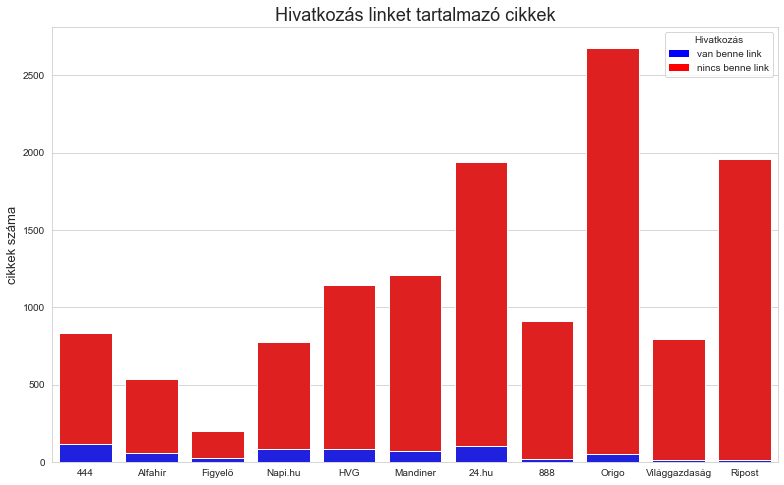

In [326]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(13, 8))

# Plot 1 - background - "total" (top) series
sns.barplot(
    data=grouped.loc[grouped["Page"] != "Index"].sort_values(
        by=["perc"], ascending=False
    ),
    x="Page",
    y="n",
    ci=None,
    color="red",
    ax=ax,
)

# Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(
    data=grouped.loc[grouped["Page"] != "Index"].sort_values(
        by=["perc"], ascending=False
    ),
    x="Page",
    y="sum",
    ci=None,
    color="blue",
    ax=ax,
)


topbar = plt.Rectangle((0, 0), 1, 1, fc="red", edgecolor="none")
bottombar = plt.Rectangle((0, 0), 1, 1, fc="blue", edgecolor="none")

ax.legend(
    (bottombar, topbar),
    ("van benne link", "nincs benne link"),
    loc="upper right",
    prop={"size": 10},
).set_title("Hivatkozás", prop={"size": 10})


ax.set_title(
    "Hivatkozás linket tartalmazó cikkek",
    fontsize=18,
)
ax.set_xlabel(None)
ax.set_ylabel("cikkek száma", fontsize=13)

plt.show()

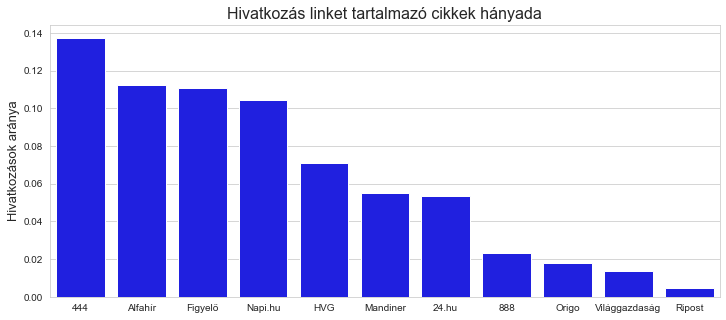

In [328]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(12, 5))

sns.barplot(
    data=grouped.loc[grouped["Page"] != "Index"].sort_values(
        by=["perc"], ascending=False
    ),
    x="Page",
    y="perc",
    ci=None,
    color="blue",
    ax=ax,
)

ax.set_title(
    "Hivatkozás linket tartalmazó cikkek hányada",
    fontsize=16,
)
ax.set_xlabel(None)
ax.set_ylabel("Hivatkozások aránya", fontsize=13)

plt.show()

In [332]:
subset.to_csv("clean_aug.csv")

In [383]:
import pdfminer

In [386]:
from pdfminer.high_level import extract_text

In [387]:
text = extract_text('ny201103-ossze.pdf')

In [389]:
print(text)

   2018-2022. országgyűlési ciklus   Budapest, 2020. november 3. kedd 

161/1. szám 

 

Országgyűlési Napló 

Dr. Hiller István, Jakab István,  
dr. Latorcai János és Lezsák Sándor  
elnöklete alatt 
 
Jegyzők: Földi László, dr. Steinmetz Ádám,  
dr. Varga László, dr. Vinnai Győző 

 
 
 
 

 

 

 
 
 
 

 
 
 
 
 
 
 
 
 
 
 

 
 
 
 
 
 
 
 

Hasáb 

Tárgyai   
 
Az ülésnap megnyitása ............................................................................................................................... 22557 
 
Megemlékezés a Magyar Tudomány Ünnepéről ................................................................................ 22557 
 
Napirend előtti felszólalások: 
Tordai Bence (Párbeszéd) ..................................................................................................................... 22558 
 
Dömötör Csaba, a Miniszterelnöki Kabinetiroda államtitkára ................................................. 22560 
 
 
Demeter Márta (LMP) ...............